In [1]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv('owid-covid-data.csv',encoding='cp949')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97121,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97122,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97123,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97124,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [3]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [18]:
df[['population','location','date','people_vaccinated']]

,population,location,date,people_vaccinated
0,38928341.0,Afghanistan,2020-02-24,NaN
1,38928341.0,Afghanistan,2020-02-25,NaN
2,38928341.0,Afghanistan,2020-02-26,NaN
3,38928341.0,Afghanistan,2020-02-27,NaN
4,38928341.0,Afghanistan,2020-02-28,NaN
...,...,...,...,...
97121,14862927.0,Zimbabwe,2021-06-16,697399.0
97122,14862927.0,Zimbabwe,2021-06-17,698953.0
97123,14862927.0,Zimbabwe,2021-06-18,700244.0
97124,14862927.0,Zimbabwe,2021-06-19,701348.0


In [28]:
df_pop = df['population']

In [8]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [50]:
df_weekly = df['date']
df_weekly

33831   2020-12-01
33832   2020-12-02
33833   2020-12-03
33834   2020-12-04
33835   2020-12-05
           ...    
92563   2021-06-16
92564   2021-06-17
92565   2021-06-18
92566   2021-06-19
92567   2021-06-20
Name: date, Length: 1011, dtype: datetime64[ns]

In [38]:
df_germany=df[df['location']=='Germany']
df_france=df[df['location']=='France']
df_italy=df[df['location']=='Italy']
df_portugal=df[df['location']=='Portugal']
df_sweden=df[df['location']=='Sweden']

In [10]:
from matplotlib import font_manager, rc
import matplotlib
font_location='c:/windows/fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

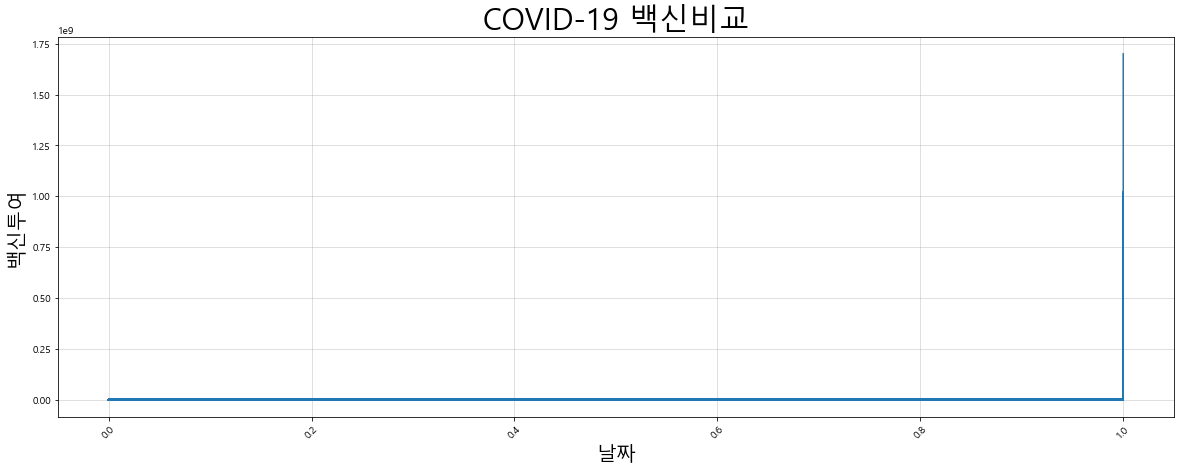

In [82]:
plt.figure(figsize=(20,7))
plt.plot(df['date']>'2020-12-30.',df['people_vaccinated'])
plt.xlabel('날짜', size=20)
plt.ylabel('백신투여', size=20)
plt.title('COVID-19 백신비교', size=30)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

In [25]:
df.columns[4:]

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'peop

In [33]:
dates=df['date']
cases=[]
for date in dates :
    cases.append(df_pop[date])
cases    

KeyError: '2020-02-24'

In [37]:
df['location'][1]

'Afghanistan'

In [52]:
import numpy as np

location    Germany   Israel  South Korea  United Kingdom  United States
date                                                                    
2020-12-01  295.594  138.408        9.967         198.819        568.995
2020-12-02  277.798  182.426       10.533         239.180        612.968
2020-12-03  281.569  166.136       12.269         220.237        674.983
2020-12-04  190.609   80.295       11.371         241.316        702.846
2020-12-05  311.826  199.294       12.308         229.488        651.992
...             ...      ...          ...             ...            ...
2021-06-17   10.754    3.119        9.889         159.429         31.417
2021-06-18   11.136    2.542        9.401         151.533         62.259
2021-06-19   11.888    7.048        8.368         148.425         25.740
2021-06-20    6.314    4.275        6.963         133.709         11.758
2021-06-21    0.000    0.000        0.000           0.000          0.000

[203 rows x 5 columns]


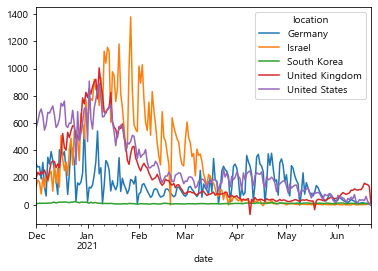

In [49]:
df = pd.read_csv(
                "owid-covid-data.csv",
                usecols=['location','date','new_cases_per_million'],
                parse_dates=['date'])
countries = ['United States', 'Germany', 'United Kingdom', 'Israel','South Korea']
df = df[df['location'].isin(countries)]
df = df[df['date'] >= '2020.12.01']
df = df.fillna(0)
import matplotlib as mpl
from matplotlib import pyplot as plt
data = df.pivot('date', 'location', 'new_cases_per_million')
data=data.fillna(0)
print(data)
data.plot()
# plt.ylabel('검거율')   # y축 이름 설정
# plt.ylim([0,150])    # y축 범위 설정
# plt.xticks(data.index)   # x축 눈금 변경
# plt.title('구별 검거율 추세')  # plot 제목 설정
plt.show()

In [54]:
monthly_df = df.resample('M', how={'all_news_num':np.sum}).fillna(0)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [57]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97121,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97122,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97123,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
97124,ZWE,Africa,Zimbabwe,2021-06-19,41628.0,293.0,253.714,1666.0,10.0,4.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [59]:
month = [g for n, g in df.set_index('date').groupby(pd.Grouper(freq='M'))]

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [64]:
df.astype({'date':'int'}).dtypes

ValueError: invalid literal for int() with base 10: '2020-02-24'

            location       date  new_cases_per_million
33831        Germany 2020-12-01                295.594
33832        Germany 2020-12-02                277.798
33833        Germany 2020-12-03                281.569
33834        Germany 2020-12-04                190.609
33835        Germany 2020-12-05                311.826
...              ...        ...                    ...
92563  United States 2021-06-16                 37.553
92564  United States 2021-06-17                 31.417
92565  United States 2021-06-18                 62.259
92566  United States 2021-06-19                 25.740
92567  United States 2021-06-20                 11.758

[1011 rows x 3 columns]
location    Germany   Israel  South Korea  United Kingdom  United States
date                                                                    
2020-12-01  295.594  138.408        9.967         198.819        568.995
2020-12-02  277.798  182.426       10.533         239.180        612.968
2020-12-03  281.569  16

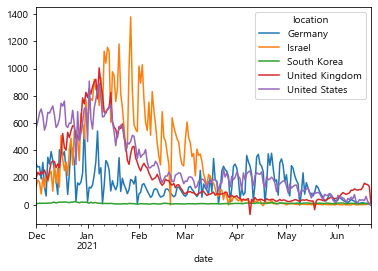

In [66]:
df = pd.read_csv(
                "owid-covid-data.csv",
                usecols=['location','date','new_cases_per_million'],
                parse_dates=['date'])
countries = ['United States', 'Germany', 'United Kingdom', 'Israel','South Korea']
df = df[df['location'].isin(countries)]
df = df[df['date'] >= '2020.12.01']
print(df)
import matplotlib as mpl
from matplotlib import pyplot as plt
data = df.pivot('date', 'location', 'new_cases_per_million')
data=data.fillna(0)
print(data)
data.plot()
# plt.ylabel('검거율')   # y축 이름 설정
# plt.ylim([0,150])    # y축 범위 설정
# plt.xticks(data.index)   # x축 눈금 변경
# plt.title('구별 검거율 추세')  # plot 제목 설정
plt.show()

In [68]:
df = pd.read_csv(
                "owid-covid-data.csv",
                usecols=['location','date','new_cases_per_million'],
                parse_dates=['date'])
countries = ['United States', 'Germany', 'United Kingdom', 'Israel','South Korea']
df = df[df['pupulation']]
df = df[df['date'] >= '2020.12.01']
print(df)
import matplotlib as mpl
from matplotlib import pyplot as plt
data = df.pivot('date', 'people_vaccinated', 'population')
data=data.fillna(0)
print(data)
data.plot()
plt.show()

KeyError: 'pupulation'

            location       date  new_cases  people_vaccinated  \
33831        Germany 2020-12-01    24766.0                NaN   
33832        Germany 2020-12-02    23275.0                NaN   
33833        Germany 2020-12-03    23591.0                NaN   
33834        Germany 2020-12-04    15970.0                NaN   
33835        Germany 2020-12-05    26126.0                NaN   
...              ...        ...        ...                ...   
92563  United States 2021-06-16    12430.0        175053401.0   
92564  United States 2021-06-17    10399.0        175867860.0   
92565  United States 2021-06-18    20608.0        176290249.0   
92566  United States 2021-06-19     8520.0        176737141.0   
92567  United States 2021-06-20     3892.0        177088290.0   

       people_vaccinated_per_hundred   population          v  
33831                            NaN   83783945.0        NaN  
33832                            NaN   83783945.0        NaN  
33833                         

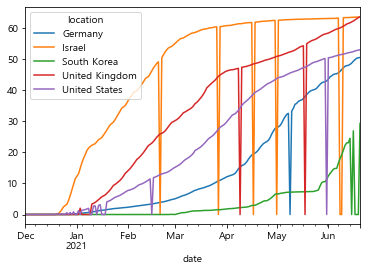

In [83]:
df = pd.read_csv(
                "owid-covid-data.csv",
                usecols=['location','date','people_vaccinated','new_cases','population','people_vaccinated_per_hundred'],
                parse_dates=['date'])
countries = ['United States', 'Germany', 'United Kingdom', 'Israel','South Korea']
df = df[df['location'].isin(countries)]
df = df[df['date'] >= '2020.12.01']
df = df[df['new_cases'] > 0]
df['v'] = df['people_vaccinated'] / df['population'] * 100
print(df)
import matplotlib as mpl
from matplotlib import pyplot as plt
data = df.pivot('date', 'location', 'people_vaccinated_per_hundred')
data=data.fillna(0)
print(data)
data.plot()
plt.show()